LE611 - Pesquisa Operacional II

Projeto 1


---




Integrantes do grupo:
- Augusto Chebel Machado (RA: 231762)
- João Pedro Marretto Helmeister (RA: 174564)
- Lucas Massabni Busnardo (RA: 182516)
- Lucas Tramonte (RA: 182697)
- Nathan Czelusniak de Siqueira (RA: 186041)
- Vinicius Consentino Muniz (RA: 245271)


---



Determinação das questões a serem resolvidas

In [ ]:
import random

comp = int(input('Digite número de componentes do grupo:'))

if (comp <= 3):
  sorteio = 1
else:
  sorteio = 2

for i in range(sorteio):
  ra = int(input('Digite seu ra:'))
  random.seed(ra)
  value = random.randint(1, 4)
  print('Projeto 1 - Faça a questão: ', value)

Digite número de componentes do grupo:6
Digite seu ra:231762
Projeto 1 - Faça a questão:  2
Digite seu ra:245271
Projeto 1 - Faça a questão:  4


Importando as bibliotecas que serão utilizadas

In [ ]:
# importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
!pip install ortools
from ortools.linear_solver import pywraplp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.0 MB 11.9 MB/s 
     |████████████████████████████████| 408 kB 71.1 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzcolab20220719082949 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.6 which is incompatible.
tensorflow-metadata 1.10.0 requires protobuf<4,>=3.13, but you have protobuf 4.21.6 which is incompatible.
google-cloud-bigquery-storage 1.1.2 requires protobuf<4.0.0dev, but you have protobuf 4.21.6 which is incompatible.
google-api-core 1.31.6 requires protobuf<4.0.0dev,>=3.12.0; python_version > "3", but you have prot

> Questão 2

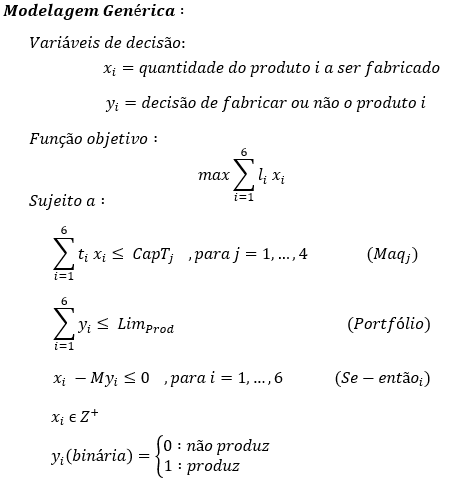

In [ ]:
# Questão 2
# inicializando o solver
solver_Q2 = pywraplp.Solver_CreateSolver('CBC') # CBC - CBC_MIXED_INTEGER_PROGRAMMING

# informando algumas características do problema
n_prod = 6
n_maq = 4

# criando as variáveis de decisão
x = []
y = []
for i in range(n_prod):
  xi = solver_Q2.IntVar(0, solver_Q2.infinity(), f'x{i+1}')  # variáveis inteiras - quantidade de cada produto
  yi = solver_Q2.BoolVar(f'y{i+1}')                          # variáveis binárias - decisão de produção
  x.append(xi)
  y.append(yi)

# Ax = b
# matriz de coeficientes A
fluxo = [[1, 0, 3, 0, 2, 0],
         [3, 2, 0, 0, 0, 3],
         [0, 0, 1, 3, 0, 1],
         [0, 2, 0, 1, 2, 0]]

# vetor b
dispo = [11, 13, 12, 10]

# adicionando as restrições
for i in range(n_maq):
  solver_Q2.Add(solver_Q2.Sum(fluxo[i][j]*x[j] for j in range(n_prod)) <= dispo[i], name=f'Disponibilidade M{i+1}')
  # restrição da capacidade de cada máquina

max_prod = 4
solver_Q2.Add(solver_Q2.Sum(y) <= max_prod, name=f'Limitação de layout')   # restrição do portfólio de produtos

M = 50   # valor arbitrariamente grande
for i in range(n_prod):
  solver_Q2.Add(x[i] <= M*y[i], name=f'Se-então_P{i+1}')    # restrição do tipo se-então

# função objetivo
lucro = [6, 5, 7, 7, 6, 5]
solver_Q2.Maximize(solver_Q2.Sum(lucro[j]*x[j] for j in range(n_prod)))

# Mostra a formulação final do problema com a quantidade de variáveis e restrições.
print(solver_Q2.ExportModelAsLpFormat(obfuscated=False))

\ Generated by MPModelProtoExporter
\   Name             : 
\   Format           : Free
\   Constraints      : 11
\   Variables        : 12
\     Binary         : 6
\     Integer        : 6
\     Continuous     : 0
Maximize
 Obj: +6 x1 +5 x2 +7 x3 +7 x4 +6 x5 +5 x6 
Subject to
 Disponibilidade_M1: +1 x1 +3 x3 +2 x5  <= 11
 Disponibilidade_M2: +3 x1 +2 x2 +3 x6  <= 13
 Disponibilidade_M3: +1 x3 +3 x4 +1 x6  <= 12
 Disponibilidade_M4: +2 x2 +1 x4 +2 x5  <= 10
 Limitação_de_layout: +1 y1 +1 y2 +1 y3 +1 y4 +1 y5 +1 y6  <= 4
 Se_então_P1: +1 x1 -50 y1  <= 0
 Se_então_P2: +1 x2 -50 y2  <= 0
 Se_então_P3: +1 x3 -50 y3  <= 0
 Se_então_P4: +1 x4 -50 y4  <= 0
 Se_então_P5: +1 x5 -50 y5  <= 0
 Se_então_P6: +1 x6 -50 y6  <= 0
Bounds
 0 <= x1 <= inf
 0 <= y1 <= 1
 0 <= x2 <= inf
 0 <= y2 <= 1
 0 <= x3 <= inf
 0 <= y3 <= 1
 0 <= x4 <= inf
 0 <= y4 <= 1
 0 <= x5 <= inf
 0 <= y5 <= 1
 0 <= x6 <= inf
 0 <= y6 <= 1
Binaries
 y1
 y2
 y3
 y4
 y5
 y6
Generals
 x1
 x2
 x3
 x4
 x5
 x6
End



In [ ]:
# resolve o problema
solver_Q2.Solve()

# relatório
# relatório
for i in range(n_prod):
  if y[i].solution_value() == 1:
    print(f'P{i+1} está no portfólio.')
    print(f'Qtde de P{i+1} = {x[i].solution_value()}')
    print()
print(f'FO = R${solver_Q2.Objective().Value()}')
print()

# Parâmetros de desempenho computacional do Solver
print(f'O tempo computacional exigido para o código é: {round(solver_Q2.wall_time()/60000,3)} s')

P1 está no portfólio.
Qtde de P1 = 4.0

P4 está no portfólio.
Qtde de P4 = 4.0

P5 está no portfólio.
Qtde de P5 = 3.0

FO = R$70.0

O tempo computacional exigido para o código é: 0.073 s


> Questão 4

In [ ]:
# Questão 4
# inicializando o solver
solver_Q4 = pywraplp.Solver_CreateSolver('CBC') # CBC - CBC_MIXED_INTEGER_PROGRAMMING

# informando algumas características do problema
n_prod = 6
n_maq = 4

# criando as variáveis de decisão
x = []
y = []
for i in range(n_prod):
  xi = solver_Q4.IntVar(0, solver_Q4.infinity(), f'x{i+1}')  # variáveis inteiras - quantidade de cada produto
  yi = solver_Q4.BoolVar(f'y{i+1}')                          # variáveis binárias - decisão de produção
  x.append(xi)
  y.append(yi)

# Ax = b
# matriz de coeficientes A
fluxo = [[1, 0, 3, 0, 2, 0],
         [3, 2, 0, 0, 0, 3],
         [0, 0, 1, 3, 0, 1],
         [0, 2, 0, 1, 2, 0]]

# vetor b
# disponibilidades para questão 2 = [11, 13, 12, 10]
dispo = [9, 12, 13, 9]

# adicionando as restrições
for i in range(n_maq):
  solver_Q4.Add(solver_Q4.Sum(fluxo[i][j]*x[j] for j in range(n_prod)) <= dispo[i], name=f'Disponibilidade M{i+1}') # restrição da capacidade de cada máquina

# na questão 2 o máximo de produtos era 4
max_prod = 2
solver_Q4.Add(solver_Q4.Sum(y) <= max_prod, name=f'Limitação de layout')   # restrição do portfólio de produtos

M = 50   # valor arbitrariamente grande
for i in range(n_prod):
  solver_Q4.Add(x[i] <= M*y[i], name=f'Se-então_P{i+1}')    # restrição do tipo se-então

# função objetivo
# lucro na questão 2 = [6, 5, 7, 7, 6, 5]
lucro = [5, 2, 6, 3, 7, 4]
solver_Q4.Maximize(solver_Q4.Sum(lucro[j]*x[j] for j in range(n_prod)))

# Mostra a formulação final do problema com a quantidade de variáveis e restrições.
print(solver_Q4.ExportModelAsLpFormat(obfuscated=False))

\ Generated by MPModelProtoExporter
\   Name             : 
\   Format           : Free
\   Constraints      : 11
\   Variables        : 12
\     Binary         : 6
\     Integer        : 6
\     Continuous     : 0
Maximize
 Obj: +5 x1 +2 x2 +6 x3 +3 x4 +7 x5 +4 x6 
Subject to
 Disponibilidade_M1: +1 x1 +3 x3 +2 x5  <= 9
 Disponibilidade_M2: +3 x1 +2 x2 +3 x6  <= 12
 Disponibilidade_M3: +1 x3 +3 x4 +1 x6  <= 13
 Disponibilidade_M4: +2 x2 +1 x4 +2 x5  <= 9
 Limitação_de_layout: +1 y1 +1 y2 +1 y3 +1 y4 +1 y5 +1 y6  <= 2
 Se_então_P1: +1 x1 -50 y1  <= 0
 Se_então_P2: +1 x2 -50 y2  <= 0
 Se_então_P3: +1 x3 -50 y3  <= 0
 Se_então_P4: +1 x4 -50 y4  <= 0
 Se_então_P5: +1 x5 -50 y5  <= 0
 Se_então_P6: +1 x6 -50 y6  <= 0
Bounds
 0 <= x1 <= inf
 0 <= y1 <= 1
 0 <= x2 <= inf
 0 <= y2 <= 1
 0 <= x3 <= inf
 0 <= y3 <= 1
 0 <= x4 <= inf
 0 <= y4 <= 1
 0 <= x5 <= inf
 0 <= y5 <= 1
 0 <= x6 <= inf
 0 <= y6 <= 1
Binaries
 y1
 y2
 y3
 y4
 y5
 y6
Generals
 x1
 x2
 x3
 x4
 x5
 x6
End



In [ ]:
# resolve o problema
solver_Q4.Solve()

# relatório
for i in range(n_prod):
  if y[i].solution_value() == 1:
    print(f'P{i+1} está no portfólio.')
    print(f'Qtde de P{i+1} = {x[i].solution_value()}')
    print()
print(f'FO = R${solver_Q4.Objective().Value()}')
print()

# Parâmetros de desempenho computacional do Solver
print(f'O tempo computacional exigido para o código é: {round(solver_Q4.wall_time()/60000,3)} s')

P5 está no portfólio.
Qtde de P5 = 4.0

P6 está no portfólio.
Qtde de P6 = 4.0

FO = R$44.0

O tempo computacional exigido para o código é: 0.806 s


In [ ]:
def res(cap,port):
  solver_Q2 = pywraplp.Solver_CreateSolver('CBC') # CBC - CBC_MIXED_INTEGER_PROGRAMMING

  # informando algumas características do problema
  n_prod = 6
  n_maq = 4

  # criando as variáveis de decisão
  x = []
  y = []
  for i in range(n_prod):
    xi = solver_Q2.IntVar(0, solver_Q2.infinity(), f'x{i+1}')  # variáveis inteiras - quantidade de cada produto
    yi = solver_Q2.BoolVar(f'y{i+1}')                          # variáveis binárias - decisão de produção
    x.append(xi)
    y.append(yi)

  # Ax = b
  # matriz de coeficientes A
  fluxo = [[1, 0, 3, 0, 2, 0],
          [3, 2, 0, 0, 0, 3],
          [0, 0, 1, 3, 0, 1],
          [0, 2, 0, 1, 2, 0]]

  # vetor b
  dispo = cap

  # adicionando as restrições
  for i in range(n_maq):
    solver_Q2.Add(solver_Q2.Sum(fluxo[i][j]*x[j] for j in range(n_prod)) <= dispo[i], name=f'Disponibilidade M{i+1}')
    # restrição da capacidade de cada máquina

  max_prod = port
  solver_Q2.Add(solver_Q2.Sum(y) <= max_prod, name=f'Limitação de layout')   # restrição do portfólio de produtos

  M = 50   # valor arbitrariamente grande
  for i in range(n_prod):
    solver_Q2.Add(x[i] <= M*y[i], name=f'Se-então_P{i+1}')    # restrição do tipo se-então

  # função objetivo
  lucro = [6, 5, 7, 7, 6, 5]
  solver_Q2.Maximize(solver_Q2.Sum(lucro[j]*x[j] for j in range(n_prod)))
  solver_Q2.Solve()

  val=[f'FO = R${solver_Q2.Objective().Value()}',solver_Q2.Objective().Value()]
  return val


In [ ]:
def ana_sen(m):
  i=0
  dispo0= [11, 13, 12, 10]
  dispot =[11, 13, 12, 10]

  while res(dispo0,4)==res(dispot,4):
    dispot[m-1]=dispot[m-1]+i
    i=i+1
    if i>=10**3:
      break
  return f'Máquina {m}: Aumento Necessário: {i}, Valor Solução Ótima: {res(dispot,4)[0]}, Incremento: {res(dispot,4)[1]-res(dispo0,4)[1]}'


dispo0 =[11, 13, 12, 10]

print(f'{ana_sen(1)}\n\n{ana_sen(2)}\n\n{ana_sen(3)}\n\n{ana_sen(4)}')
print(f'\nPortifólio: Aumento Sugerido: {5}, Valor Solução Ótima: {res(dispo0,5)[0]}, Incremento: {res(dispo0,5)[1]-res(dispo0,4)[1]}\n')
print(f'Portifólio: Aumento Sugerido: {6}, Valor Solução Ótima: {res(dispo0,6)[0]}, Incremento: {res(dispo0,6)[1]-res(dispo0,4)[1]}\n')


Máquina 1: Aumento Necessário: 3, Valor Solução Ótima: FO = R$72.0, Incremento: 2.0

Máquina 2: Aumento Necessário: 3, Valor Solução Ótima: FO = R$76.0, Incremento: 6.0

Máquina 3: Aumento Necessário: 2, Valor Solução Ótima: FO = R$71.0, Incremento: 1.0

Máquina 4: Aumento Necessário: 3, Valor Solução Ótima: FO = R$73.0, Incremento: 3.0

Portifólio: Aumento Sugerido: 5, Valor Solução Ótima: FO = R$70.0, Incremento: 0.0

Portifólio: Aumento Sugerido: 6, Valor Solução Ótima: FO = R$70.0, Incremento: 0.0



In [ ]:
#Sensibilidade Questão 4.
def sol(cap,port):
  solver_Q4 = pywraplp.Solver_CreateSolver('CBC') # CBC - CBC_MIXED_INTEGER_PROGRAMMING

  # informando algumas características do problema
  n_prod = 6
  n_maq = 4

  # criando as variáveis de decisão
  x = []
  y = []
  for i in range(n_prod):
    xi = solver_Q4.IntVar(0, solver_Q4.infinity(), f'x{i+1}')  # variáveis inteiras - quantidade de cada produto
    yi = solver_Q4.BoolVar(f'y{i+1}')                          # variáveis binárias - decisão de produção
    x.append(xi)
    y.append(yi)

  # Ax = b
  # matriz de coeficientes A
  fluxo = [[1, 0, 3, 0, 2, 0],
          [3, 2, 0, 0, 0, 3],
          [0, 0, 1, 3, 0, 1],
          [0, 2, 0, 1, 2, 0]]

  # vetor b
  dispo = cap
  # print(dispo)
  # adicionando as restrições
  Rcap=list(range(0,n_maq))
  for i in range(n_maq):
    Rcap[i]=solver_Q4.Add(solver_Q4.Sum(fluxo[i][j]*x[j] for j in range(n_prod)) <= dispo[i], name=f'Disponibilidade M{i+1}')
    # restrição da capacidade de cada máquina

  max_prod = port
  solver_Q4.Add(solver_Q4.Sum(y) <= max_prod, name=f'Limitação de layout')   # restrição do portfólio de produtos

  M = 50   # valor arbitrariamente grande
  for i in range(n_prod):
    solver_Q4.Add(x[i] <= M*y[i], name=f'Se-então_P{i+1}')    # restrição do tipo se-então

  # função objetivo
  lucro = [5, 2, 6, 3, 7, 4]
  solver_Q4.Maximize(solver_Q4.Sum(lucro[j]*x[j] for j in range(n_prod)))

  solver_Q4.Solve()
  res=[f'FO = R${solver_Q4.Objective().Value()}',solver_Q4.Objective().Value()]
  return res

In [ ]:
def ana_sen(m):
  i=0
  dispo0 = [9, 12, 13, 9]
  dispot = [9, 12, 13, 9]

  while sol(dispo0,2)==sol(dispot,2):
    dispot[m-1]=dispot[m-1]+i
    i=i+1
    if i>=10**3:
      break
  return f'Máquina {m}: Aumento Necessário: {i}, Valor Solução Ótima: {sol(dispot,2)[0]}, Incremento: {sol(dispot,2)[1]-sol(dispo0,2)[1]}'

print(f'{ana_sen(1)}\n\n{ana_sen(2)}\n\n{ana_sen(3)}\n\n{ana_sen(4)}\n\n')

dispo0 = [9, 12, 13, 9]
print(f'Portifólio: Aumento Sugerido: {3}, Valor Solução Ótima: {sol(dispo0,3)[0]}, Incremento: {sol(dispo0,3)[1]-sol(dispo0,2)[1]}\n')
print(f'Portifólio: Aumento Sugerido: {4}, Valor Solução Ótima: {sol(dispo0,4)[0]}, Incremento: {sol(dispo0,4)[1]-sol(dispo0,2)[1]}\n')
print(f'Portifólio: Aumento Sugerido: {5}, Valor Solução Ótima: {sol(dispo0,5)[0]}, Incremento: {sol(dispo0,5)[1]-sol(dispo0,2)[1]}\n')
print(f'Portifólio: Aumento Sugerido: {6}, Valor Solução Ótima: {sol(dispo0,6)[0]}, Incremento: {sol(dispo0,6)[1]-sol(dispo0,2)[1]}\n')


Máquina 1: Aumento Necessário: 3, Valor Solução Ótima: FO = R$48.0, Incremento: 4.0

Máquina 2: Aumento Necessário: 3, Valor Solução Ótima: FO = R$48.0, Incremento: 4.0

Máquina 3: Aumento Necessário: 6, Valor Solução Ótima: FO = R$47.0, Incremento: 3.0

Máquina 4: Aumento Necessário: 1000, Valor Solução Ótima: FO = R$44.0, Incremento: 0.0


Portifólio: Aumento Sugerido: 3, Valor Solução Ótima: FO = R$47.0, Incremento: 3.0

Portifólio: Aumento Sugerido: 4, Valor Solução Ótima: FO = R$49.0, Incremento: 5.0

Portifólio: Aumento Sugerido: 5, Valor Solução Ótima: FO = R$49.0, Incremento: 5.0

Portifólio: Aumento Sugerido: 6, Valor Solução Ótima: FO = R$49.0, Incremento: 5.0

